In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from plotting import plot_contours
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#### Dataset Preparation

In [2]:
def generate_dataset():
    num_class1 = 50
    num_class2 = 50
    cov1 = np.array([[1, 0], [0, 2]])
    mean1 = np.array([0, 0])
    cov2 = np.array([[2, 0], [0, 1]])
    mean2 = np.array([2, 2])
    data1 = np.random.multivariate_normal(mean1, cov1, num_class1)
    data2 = np.random.multivariate_normal(mean2, cov2, num_class2)
    data = np.concatenate((data1, data2), axis=0)
    classes = np.array(
        [-1 for i in range(num_class1)] + [1 for i in range(num_class2)]
    )
    return data, classes

In [3]:
x, y = generate_dataset()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

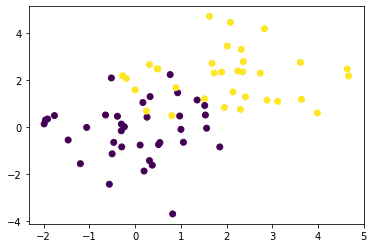

In [4]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

#### SVM:

$min_w \frac{1}{2} ||w||^2$  
$s.t. \ \ (<x_i, w> + b) \cdot y_i \geq 1, \forall i$  

In [5]:
clf = LinearSVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
weights = clf.coef_[0]
bias = clf.intercept_
score = clf.score(x_test, y_test)

print(weights)
print(bias)

[0.38514445 0.63261005]
[-1.04446833]


In [6]:
print("Score: ", score)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Score:  0.9
Confusion matrix:
 [[12  1]
 [ 2 15]]


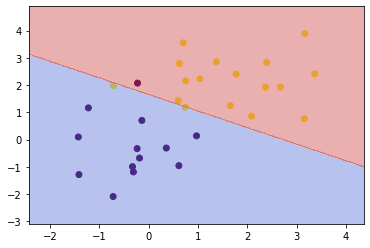

In [8]:
fig, ax = plt.subplots(1, 1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plot_contours(ax, clf, x_test[:,0], x_test[:,1], cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()